In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy.stats import norm

plt.style.use('paper')

In [2]:
csvpath = '../csvs/resonant/resonant_features/'
dfres = pd.read_csv(csvpath + 'res1e7featuressplit.csv', index_col=0)
dfres = dfres[['ID', 'Mean', 'Sigma', 'KSpval']]
dfres = dfres.sort_values(['KSpval'])
dfres.head()

,ID,Mean,Sigma,KSpval
95,95.0,4.520902,0.142438,9.937725e-36
143,143.0,4.443182,0.011909,2.458719e-25
60,60.0,4.283397,0.085474,2.771243e-20
49,49.0,5.570552,0.581446,5.088269e-20
218,228.0,3.549212,0.174091,5.088269e-20


In [3]:
csvpath = '../csvs/random/random_features/'
dfrand = pd.read_csv(csvpath + 'random1e7featuressplit.csv', index_col=0)
dfrand = dfrand[['ID', 'Mean', 'Sigma', 'KSpval']]
dfrand = dfrand.sort_values(['KSpval'])
dfrand.head()

,ID,Mean,Sigma,KSpval
104,1829.0,5.131896,0.039782,1.722384e-71
68,1601.0,4.454135,0.082126,4.184000e-66
45,1364.0,4.704747,0.048402,2.602713e-57
190,2215.0,4.470760,0.194864,2.435057e-56
221,2364.0,4.932280,0.091270,1.359119e-48


In [4]:
def quantile_hist(quantile, df, dataset, bins):
    quant = df[df['KSpval'] < df.quantile(quantile)['KSpval']]
    ID = int(quant.loc[quant['KSpval'].idxmax()]['ID'])
    
    if dataset == 'random':
        csvpath = '../csvs/random/random_features/'
        csv = csvpath+'Sys_{0}_1e8.csv'.format(ID)
    elif dataset == 'resonant':
        csvpath = '../csvs/resonant/resonant_features/'
        csv = csvpath+'Res_sys_{0}_500.csv'.format(ID)
    else:
        raise AttributeError("typo")
        
    data = pd.read_csv(csv, index_col = 0)
    data = data[data["t"]<1e8]
    logt = np.log10(data["t"])

    vals, edges = np.histogram(logt, bins, normed=True)
    mean, sigma =  df[df["ID"]==int(ID)][["Mean", "Sigma"]].values[0]
    x = np.linspace(3,7,100)
    gaussian = norm.pdf(x, mean, sigma)
    
    return vals, edges, gaussian

/home/dtamayo/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.


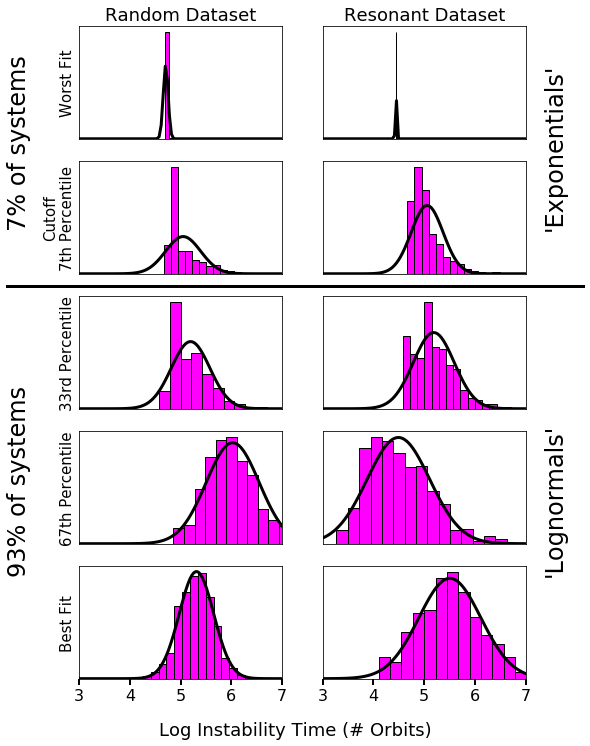

In [5]:
bins=15
quantiles = [0.01, 0.07, 0.33, 0.67, 1.]

fig, axarr = plt.subplots(ncols=2, nrows=len(quantiles), figsize=(8,12))

for i, quantile in enumerate(quantiles):
    col=0
    vals, edges, gaussian = quantile_hist(quantile, dfrand, 'random', bins)
    axarr[i, col].bar(edges[:-1], vals, ec='k', fc='magenta', width=np.diff(edges), align="edge")
    axarr[i, col].plot(np.linspace(3,7,100), gaussian, linewidth = 3, c='k')
    
    col=1
    vals, edges, gaussian = quantile_hist(quantile, dfres, 'resonant', bins)
    axarr[i, col].bar(edges[:-1], vals, ec='k', fc='magenta', width=np.diff(edges), align="edge")
    axarr[i, col].plot(np.linspace(3,7,100), gaussian, linewidth = 3, c='k')

for ax in axarr.flatten():
    ax.set_xlim([3,7])
    ax.tick_params(
        axis='both',          
        which='both',    
        left=False,
        bottom=False,
        labelleft=False,
        labelbottom=False)

for ax in axarr[-1,:]:
    ax.tick_params(
        axis='x',          
        which='both',    
        bottom=True,
        labelbottom=True)
    
axarr[0,0].set_ylabel('Worst Fit', fontsize=15)
axarr[1,0].set_ylabel('Cutoff\n7th Percentile', fontsize=15)
axarr[2,0].set_ylabel('33rd Percentile', fontsize=15)
axarr[3,0].set_ylabel('67th Percentile', fontsize=15)
axarr[4,0].set_ylabel('Best Fit', fontsize=15)
   
axarr[0,0].set_title('Random Dataset', fontsize=18)
axarr[0,1].set_title('Resonant Dataset', fontsize=18)
plt.figtext(0.5,0.06, "Log Instability Time (# Orbits)", figure=fig, ha="center", size=18)
plt.figtext(0.,0.25, "93% of systems", figure=fig, rotation='vertical', size=24)
plt.figtext(0.,0.65, "7% of systems", figure=fig, rotation='vertical', size=24)
plt.figtext(.93,0.25, "'Lognormals'", figure=fig, rotation='vertical', size=24)
plt.figtext(.93,0.65, "'Exponentials'", figure=fig, rotation='vertical', size=24)


line = plt.Line2D([0,1],[0.58,0.58], transform=fig.transFigure, color="black")
fig.add_artist(line)
fig.savefig('histograms.pdf', bbox_inches='tight')

In [6]:
cutoffres = dfres.quantile(0.07)['KSpval']
cutoffres

1.2498607776112349e-05

In [7]:
cutoffrand = dfrand.quantile(0.07)['KSpval']
cutoffrand

2.6476333977653464e-18